In [76]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import csv
import numpy as np
import os

In [117]:
def get_size(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    total = 0
    for row in csvreader:
        total = total +1
    file.close()
    return total
    
def get_header(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    header = next(csvreader)[0].split(";")
    return header

def get_row_normalized(file_name,row_name):
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    first_val = float(next(csvreader)[0].split(";")[idx])
    print('first_val: {}'.format(first_val))
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            x.append(i)
            y.append(first_val - float(itm))
    file.close()
    return np.array(x),np.array(y)

def get_row(file_name,row_name):
    
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            val = float(itm)
            if val == 0:
                x.append(i)
                y.append(np.nan)
            else:
                x.append(i)
                y.append(float(itm))
    file.close()
    return np.array(x),np.array(y)

def plot_file(file_name,save_name= None,items = None,title = None):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    if items == None:
        items = get_header(file_name)

    for item in items:
        if item == 'Remaining_space':
            x,row_i = get_row_normalized(file_name,item)
        else:
            x,row_i = get_row(file_name,item)
        ax.plot(x, row_i, label = item)
        print('got {}'.format(item))
    # naming the x axis
#     plt.xlabel('x - axis')
#     # naming the y axis
#     plt.ylabel('y - axis')
    # giving a title to my graph
    if save_name == None:
        save_name = '{}.png'.format(os.path.basename(file_name))
    if title == None:
        title = os.path.basename(file_name)
    plt.title(title)
    # show a legend on the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(save_name)
    # function to show the plot
    plt.show()

    
def plot_row(p, file_name,item,name = None):
    if not item in get_header(file_name):
        print("Error {} not found in {}".format(item,file_name))
        return p

    if item == 'Remaining_space':
        x,row_i = get_row_normalized(file_name,item)
    else:
        x,row_i = get_row(file_name,item)
    if name == None:
        name = os.path.basename(file_name)
    p.plot(x, row_i, label = name)
    return p

def plot_all(title,files,column,filter_files,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
    #         print(f)
            plot_row(ax,f,column,name=legend_map[f])


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()
    
def plot_all_multi(title,files,columns,filter_files,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
            for column in columns:
                plot_row(ax,f,column,name="{}_{}".format(legend_map[f],column))


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()

In [78]:
path_folder = "benchmarks/v2"
os.listdir(path_folder)

['.DS_Store', 'benchmaks_mac_16gb', 'macM1']

In [79]:
file_size_threshold = 11000
def get_files(path):
    files = {}
    l = []
    for f in os.listdir(path):
        file = os.path.join(path,f)
        if os.path.isdir(file):
            items = get_files(file)
            if len(items)>0:
                files[f] = items
        elif f.endswith(".csv"):
            size = get_size(file)
            if size >= file_size_threshold:
                l.append(file)
    if len(files)>0:
        return files
    else:
        return l


In [80]:
items = get_files(path_folder)
items['benchmaks_mac_16gb'][1]

'benchmarks/v2/benchmaks_mac_16gb/macpro_20220321_12_55_53_size_benchmark_1M_checkout_50_1000p3_index_1p3_compression_True.csv'

In [81]:

all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']

files_to_process = []
for file in all_files:
    size = get_size(file)
    if size >= file_size_threshold:
        print(file)
        print(size)
        files_to_process.append(file)
        

benchmarks/v2/benchmaks_mac_16gb/macpro_20220323_17_55_47_time_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_True_ram8_commit10.csv
13935
benchmarks/v2/benchmaks_mac_16gb/macpro_20220321_12_55_53_size_benchmark_1M_checkout_50_1000p3_index_1p3_compression_True.csv
35847
benchmarks/v2/benchmaks_mac_16gb/macpro_20220323_17_55_47_size_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_True_ram8_commit10.csv
13967
benchmarks/v2/benchmaks_mac_16gb/macpro_20220323_20_41_51_time_benchmark_1M_checkout_50_size_1000p3_index_100p3_compression_True_ram8_commit10.csv
30300
benchmarks/v2/benchmaks_mac_16gb/macpro_20220322_12_58_13_time_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv
41455
benchmarks/v2/benchmaks_mac_16gb/macpro_20220321_12_55_53_time_benchmark_1M_checkout_50_1000p3_index_1p3_compression_True.csv
35757
benchmarks/v2/benchmaks_mac_16gb/macpro_20220322_12_58_13_size_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv
41554
bench

In [106]:
once_list = []
st_map = {}
for f in files_to_process:
    
        
    n = f.replace('benchmarks/v2/benchmaks_mac_16gb/','')
    n = n.replace('benchmarks/v2/macM1/','')
    n = n.replace('benchmark_1M_','')
    n = n.replace('.csv','')
    n = n.replace('_size_','')
    n = n.replace('_time_','')
    ind = n.index('20220')
    n = n.replace(n[ind:ind+17],'')
#     n.replace(n[])
    
    n = n.replace('1000p3','(1000,1000,1000)')
    n = n.replace('100p3','(100,100,100)')
    n = n.replace('1p3','(1,1,1)')
    n = n.replace('50(','50_(')
    n = n.replace('index_(','index(')
    n = n.replace('_(1000,1000,1000)','_shape(1000,1000,1000)')
    n = n.replace('_shape(1000,1000,1000)','')
#     print(n)
    st_map[f] = n
    if 'size_benchmark' in f:
        print(n)
        print(get_size(f))
        once_list.append(n)
# st_map
print(once_list)

macpro_checkout_50_index(1,1,1)_compression_True
35847
macpro_checkout_50_index(1,1,1)_compression_True_ram8_commit10
13967
macpro_checkout_50_index(1,1,1)_compression_False
41554
macpro_checkout_50_index(100,100,100)_compression_True_ram8_commit10
30420
macM1max_checkout_50_index(100,100,100)_compression_False_ram20gb_commit20
32908
macM1max_checkout_50_index(1,1,1)_compression_False
13348
macM1max_checkout_50_index(1,1,1)_compression_True
45878
macM1max_checkout_50_index(1,1,1)_compression_False_ram20
15869
macM1max_checkout_50_index(100,100,100)_compression_False
45050
macM1max_checkout_50_index(1,1,1)_compression_False
20180
['macpro_checkout_50_index(1,1,1)_compression_True', 'macpro_checkout_50_index(1,1,1)_compression_True_ram8_commit10', 'macpro_checkout_50_index(1,1,1)_compression_False', 'macpro_checkout_50_index(100,100,100)_compression_True_ram8_commit10', 'macM1max_checkout_50_index(100,100,100)_compression_False_ram20gb_commit20', 'macM1max_checkout_50_index(1,1,1)_compre

In [89]:
time_benchmark = items['benchmaks_mac_16gb'][0]
size_benchmark = items['benchmaks_mac_16gb'][1]
# items['benchmaks_mac_16gb']

In [90]:
get_header(size_benchmark)

['Remaining_space', 'Logic_Size', 'DU_Size', 'Used_Size_df']

In [91]:
get_header(time_benchmark)

['Reading_time',
 'Writing_index_time',
 'Get_new_index_time',
 'Write_raw_data_time',
 'Commit_time',
 'Checkout_time',
 'GC_time']

In [92]:
items = get_row(time_benchmark,"Writing_index_time")

item index Writing_index_time = 1


item index Remaining_space = 0
first_val: 1786422720.0
got Remaining_space


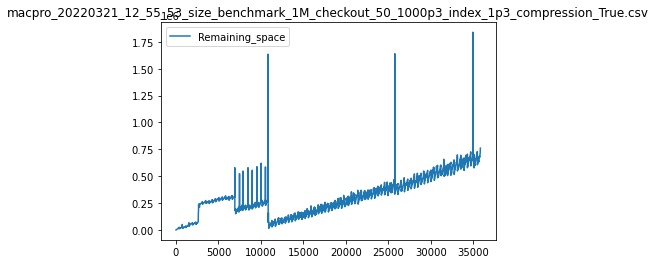

In [93]:
get_header(time_benchmark)
plot_file(size_benchmark,[ 'Remaining_space'])

item index Remaining_space = 0
first_val: 1786422720.0
got Remaining_space
item index Logic_Size = 1
got Logic_Size
item index DU_Size = 2
got DU_Size
item index Used_Size_df = 3
got Used_Size_df


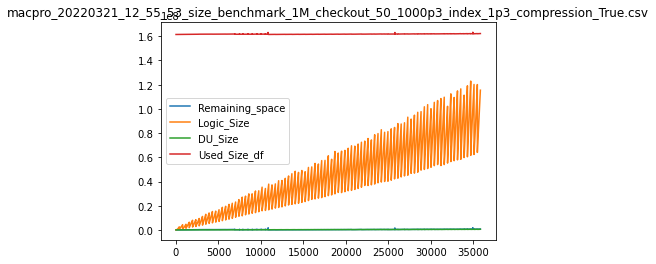

In [94]:
plot_file(size_benchmark)

In [95]:
get_header(size_benchmark)

['Remaining_space', 'Logic_Size', 'DU_Size', 'Used_Size_df']

item index Remaining_space = 0
first_val: 1786422720.0
item index Remaining_space = 0
first_val: 16718880.0
item index Remaining_space = 0
first_val: 1784476328.0
item index Remaining_space = 0
first_val: 16663416.0
item index Remaining_space = 0
first_val: 41708008.0
item index Remaining_space = 0
first_val: 1798755256.0
item index Remaining_space = 0
first_val: 1798511024.0
item index Remaining_space = 0
first_val: 41734648.0
item index Remaining_space = 0
first_val: 1799924520.0
item index Remaining_space = 0
first_val: 1800050248.0


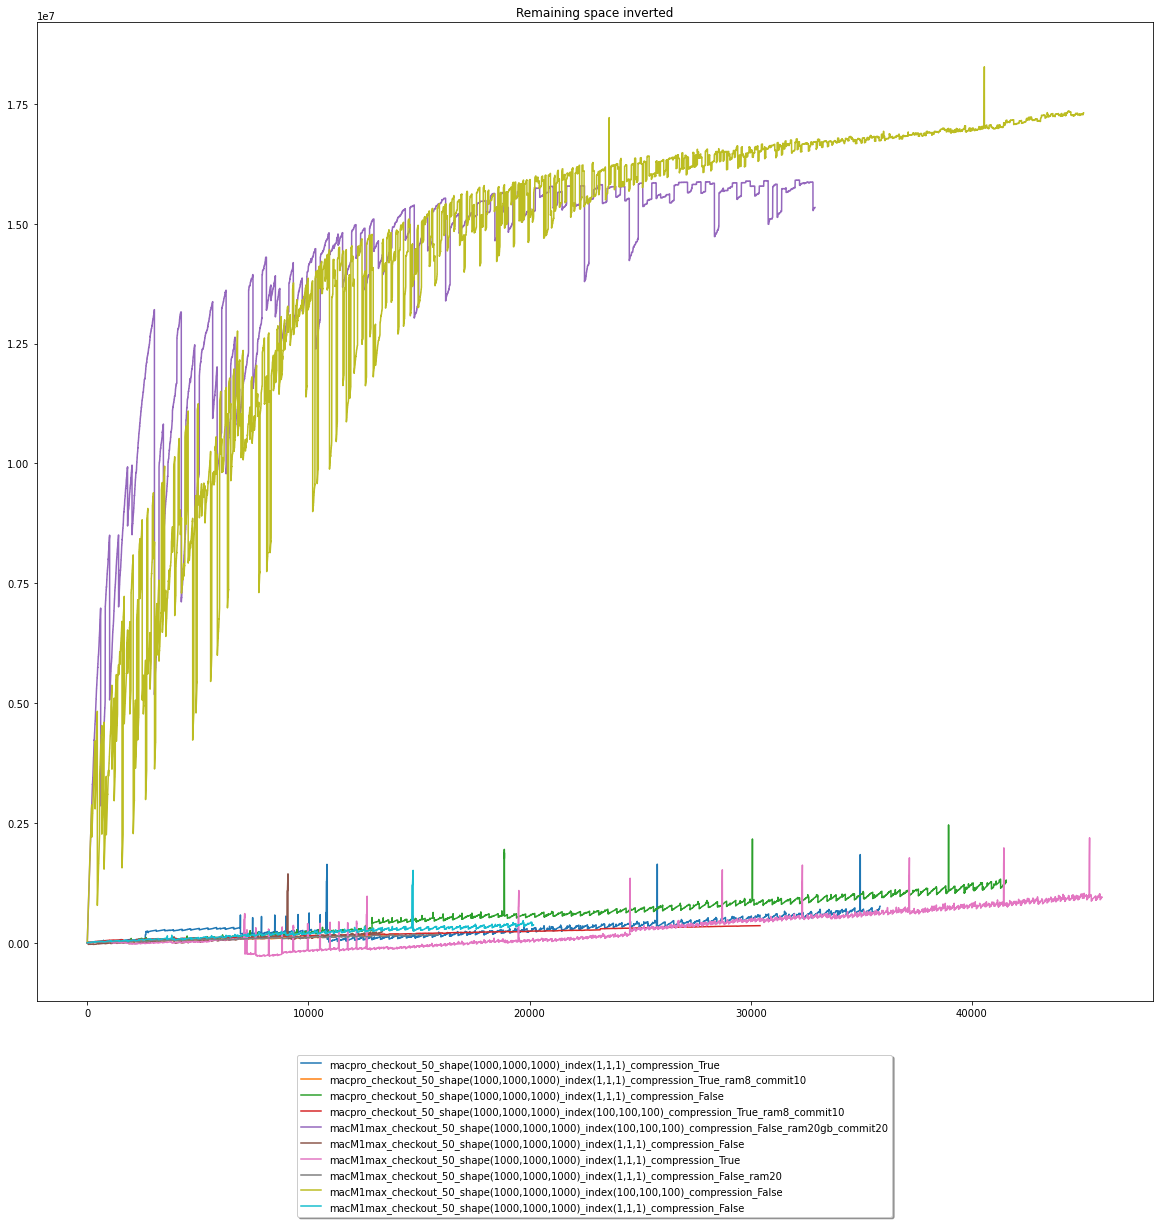

In [96]:
plot_all(title="Remaining space inverted",files=files_to_process,column='Remaining_space',filter_files='size_benchmark',output_file='all_remainng_space.png',legend_map=st_map)


item index Remaining_space = 0
first_val: 1786422720.0
item index Remaining_space = 0
first_val: 16718880.0
item index Remaining_space = 0
first_val: 1784476328.0
item index Remaining_space = 0
first_val: 16663416.0
item index Remaining_space = 0
first_val: 1798755256.0
item index Remaining_space = 0
first_val: 1798511024.0
item index Remaining_space = 0
first_val: 41734648.0
item index Remaining_space = 0
first_val: 1800050248.0


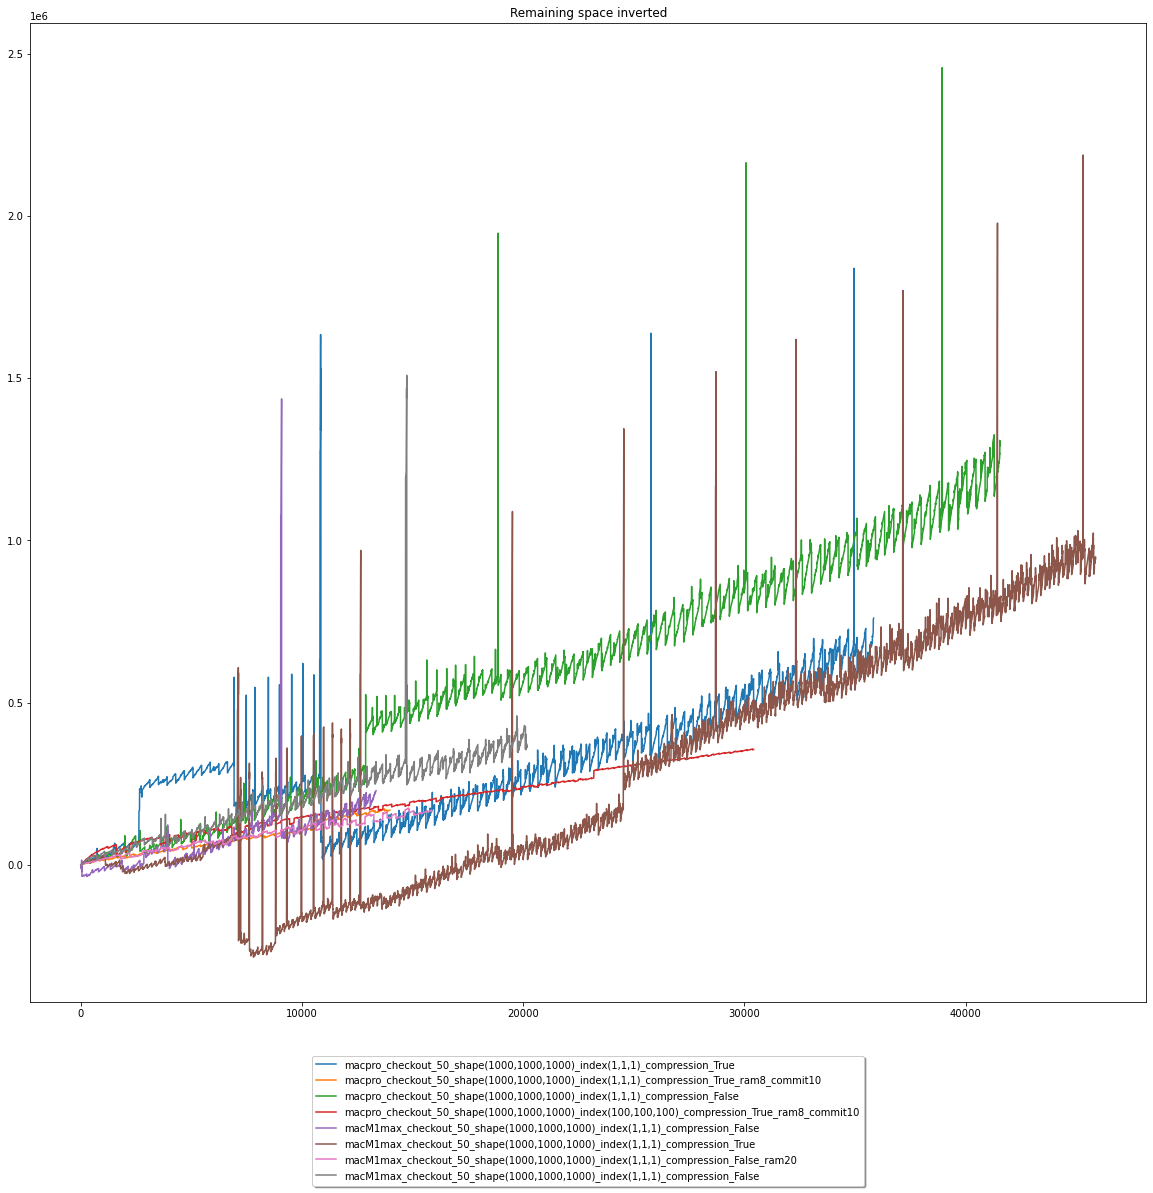

In [102]:
# Remaing space 2
filtred_files = []
for f in files_to_process:
    if 'size_benchmark' in f:
        if '100p3' in f:
            if 'True' in f:
                filtred_files.append(f)
        else:
            filtred_files.append(f)

plot_all(title="Remaining space inverted",files=filtred_files,column='Remaining_space',filter_files='.csv',output_file='all_remainng_space_filtred_flat.png',legend_map=st_map)


item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1


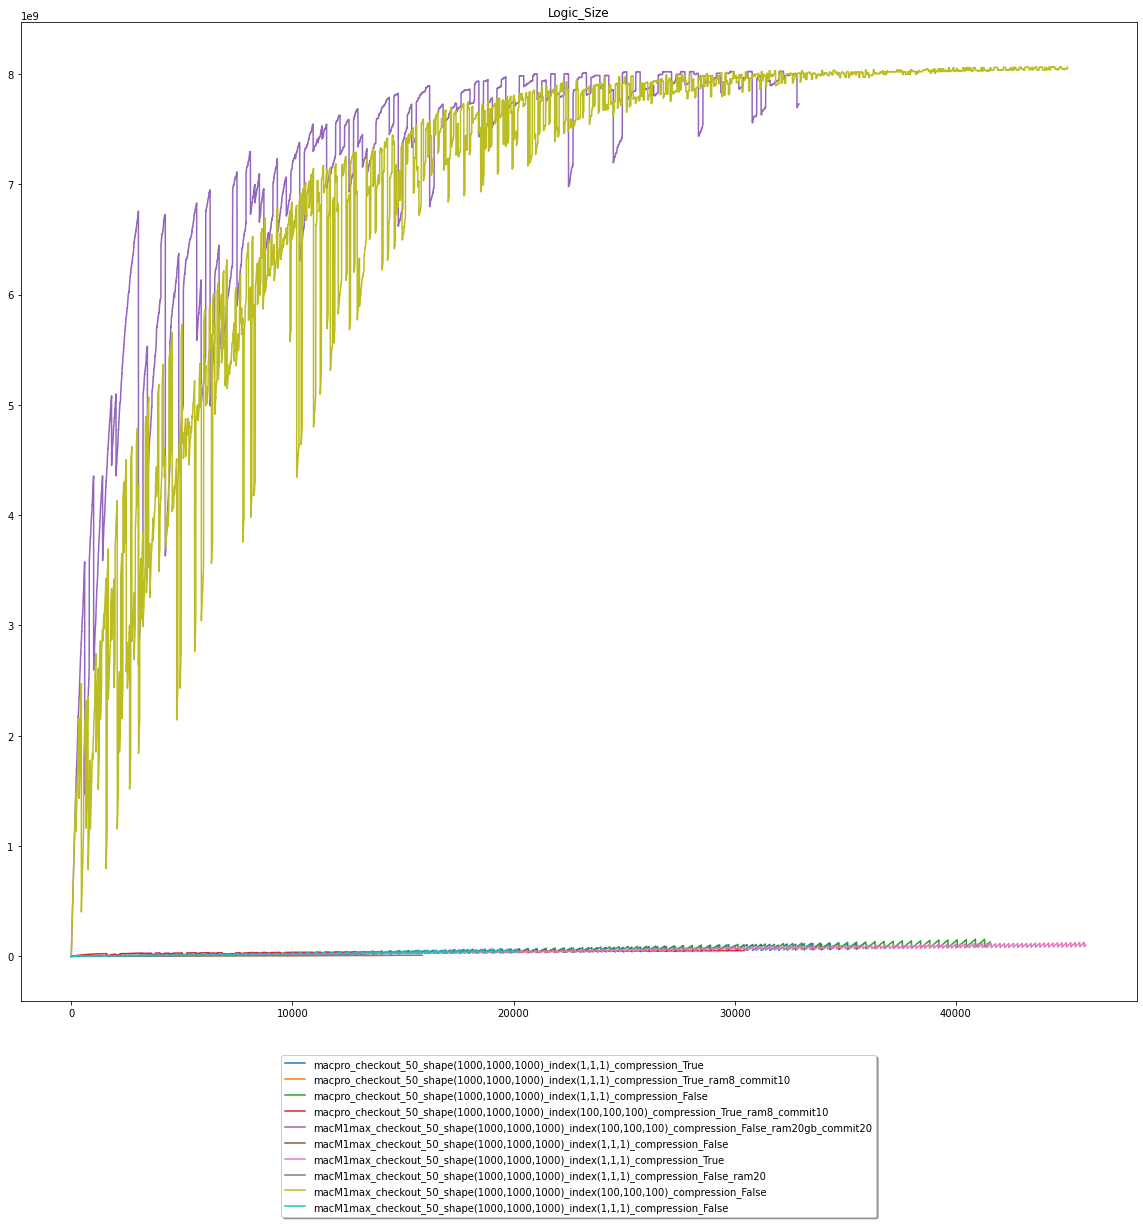

In [97]:

plot_all(title="Logic_Size",files=files_to_process,column='Logic_Size',filter_files='size_benchmark',output_file='Logic_Size.png',legend_map=st_map)


item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
Error DU_Size not found in benchmarks/v2/macM1/macM1max_20220322_10_09_32_size_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv


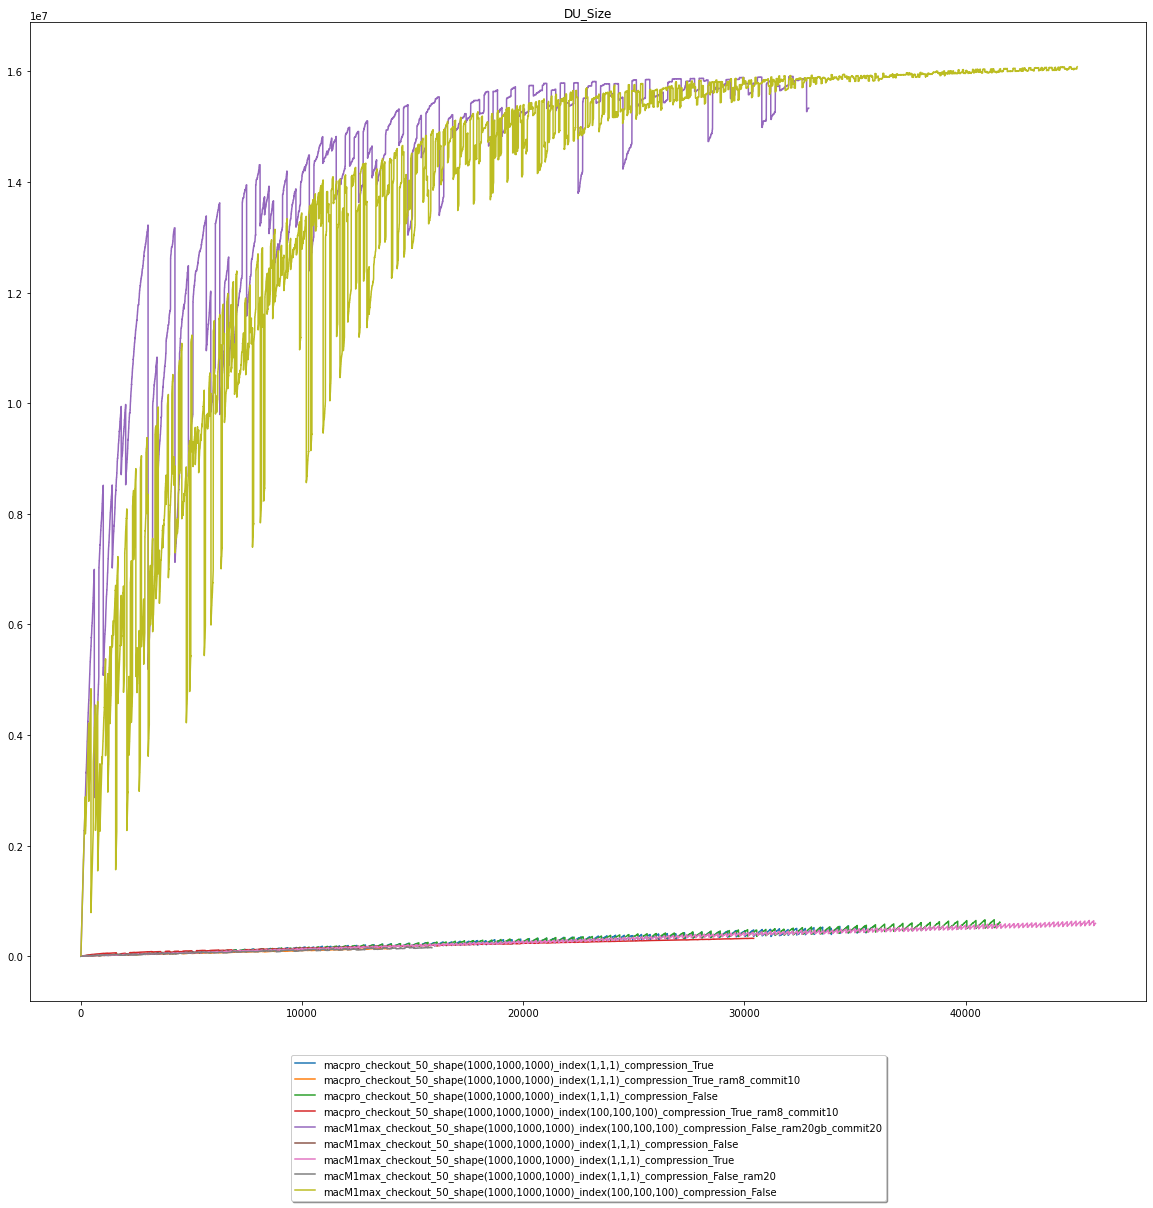

In [98]:
plot_all(title="DU_Size",files=files_to_process,column='DU_Size',filter_files='size_benchmark',output_file='DU_Size.png',legend_map=st_map)

item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 2


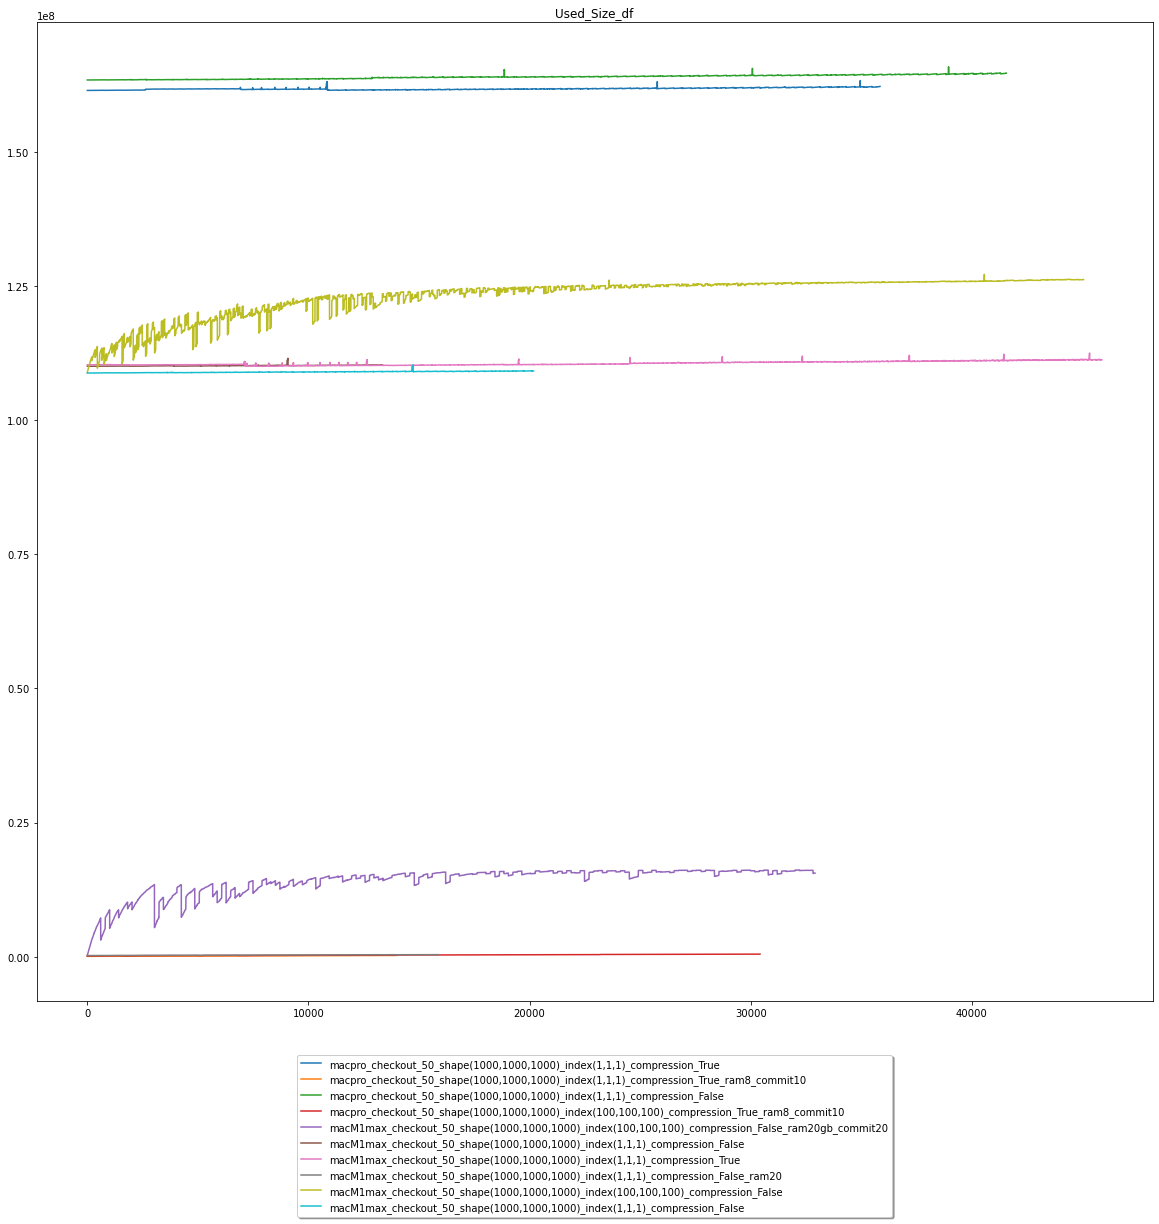

In [99]:

plot_all(title="Used_Size_df",files=files_to_process,column='Used_Size_df',filter_files='size_benchmark',output_file='Used_Size_df.png',legend_map=st_map)


item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6
item index GC_time = 6


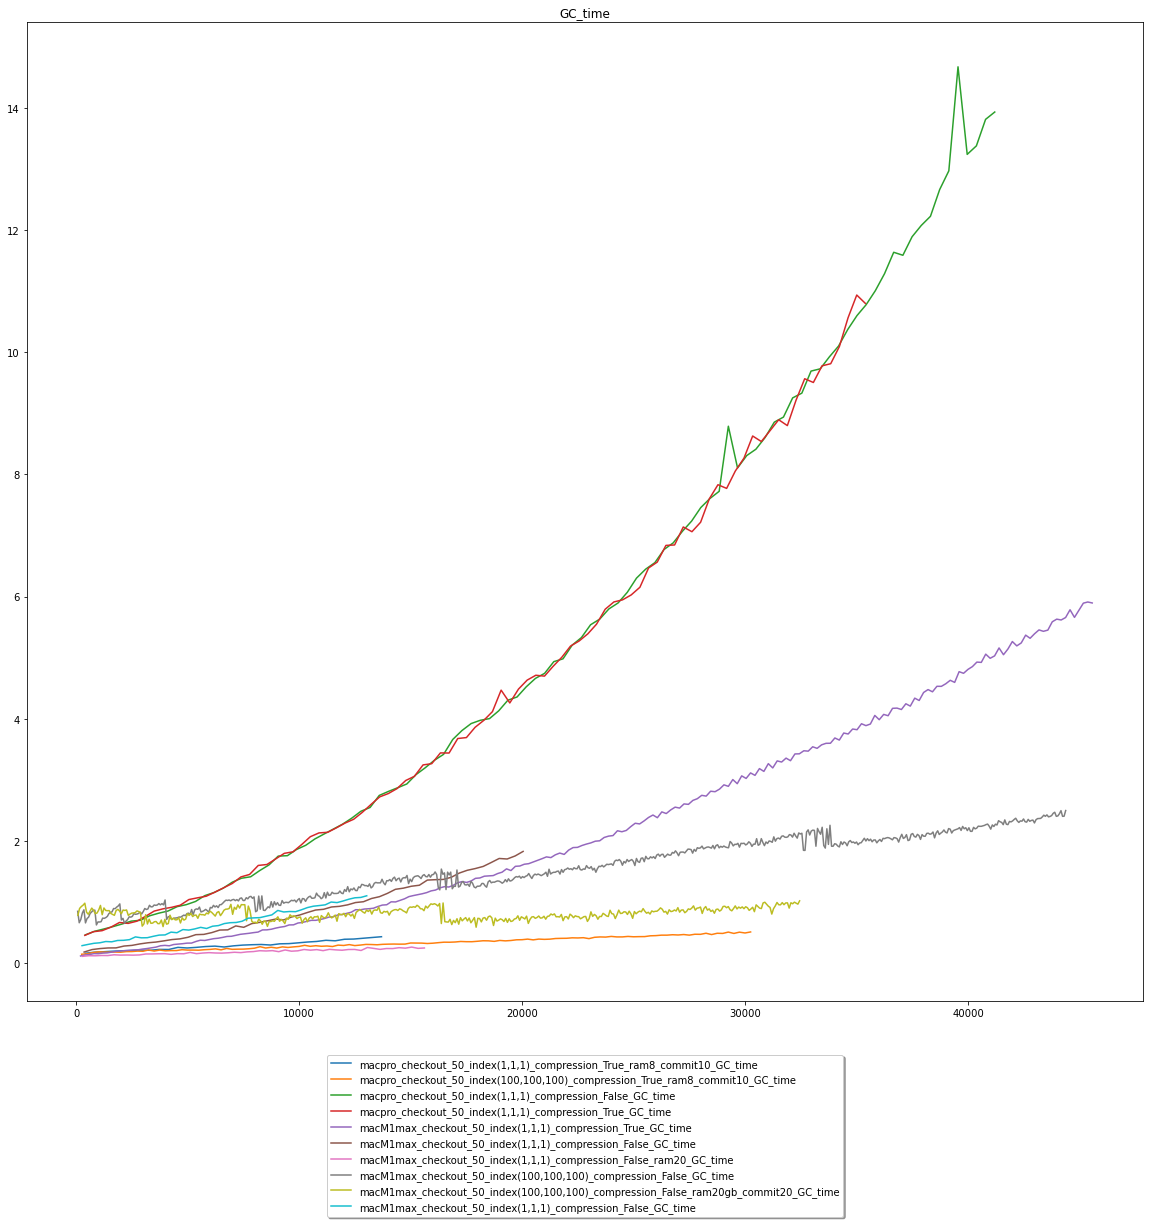

In [107]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="GC_time",files=files_to_process,columns=['GC_time'],filter_files='time_benchmark',output_file='GC_time.png',legend_map=st_map)


item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 1


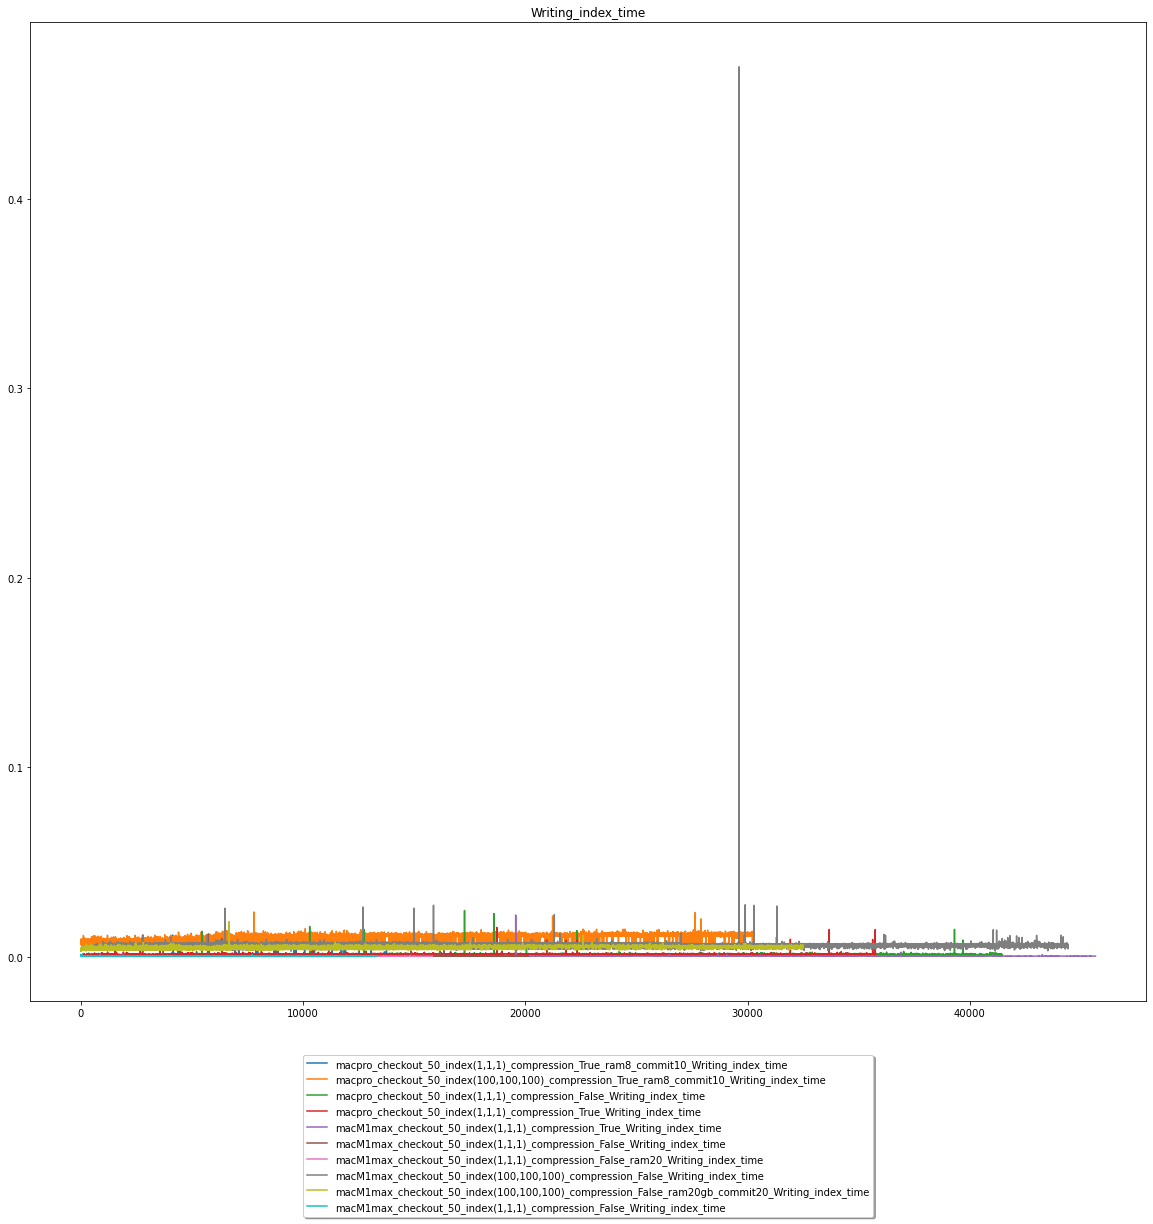

In [108]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Writing_index_time",files=files_to_process,columns=['Writing_index_time'],filter_files='time_benchmark',output_file='Writing_index_time.png',legend_map=st_map)


item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2
item index Get_new_index_time = 2


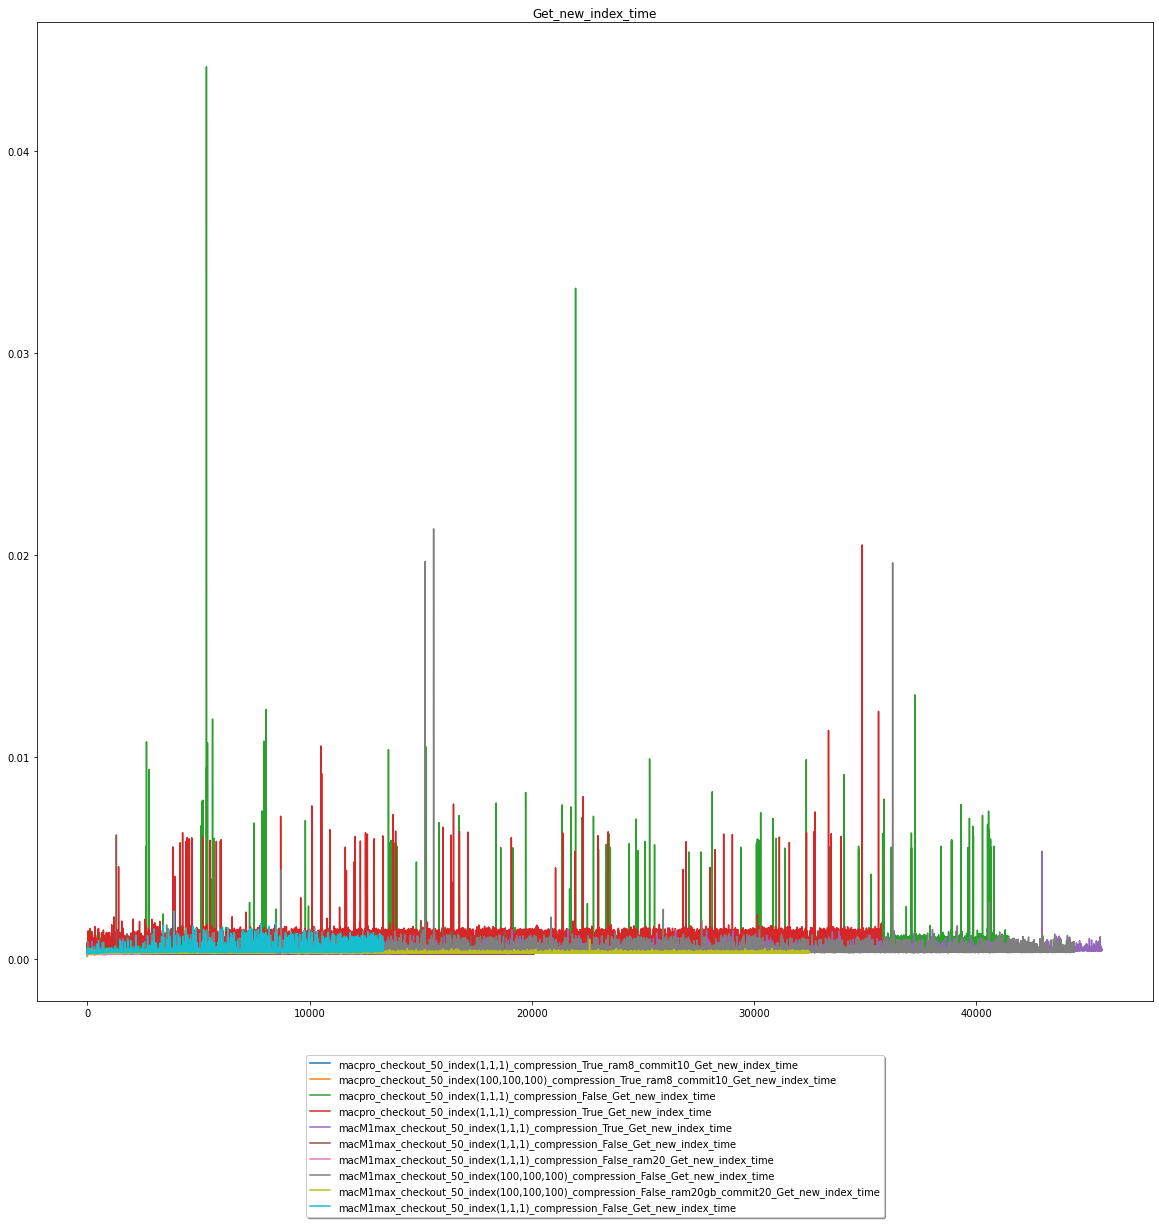

In [109]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Get_new_index_time",files=files_to_process,columns=['Get_new_index_time'],filter_files='time_benchmark',output_file='Get_new_index_time.png',legend_map=st_map)


item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5
item index Checkout_time = 5


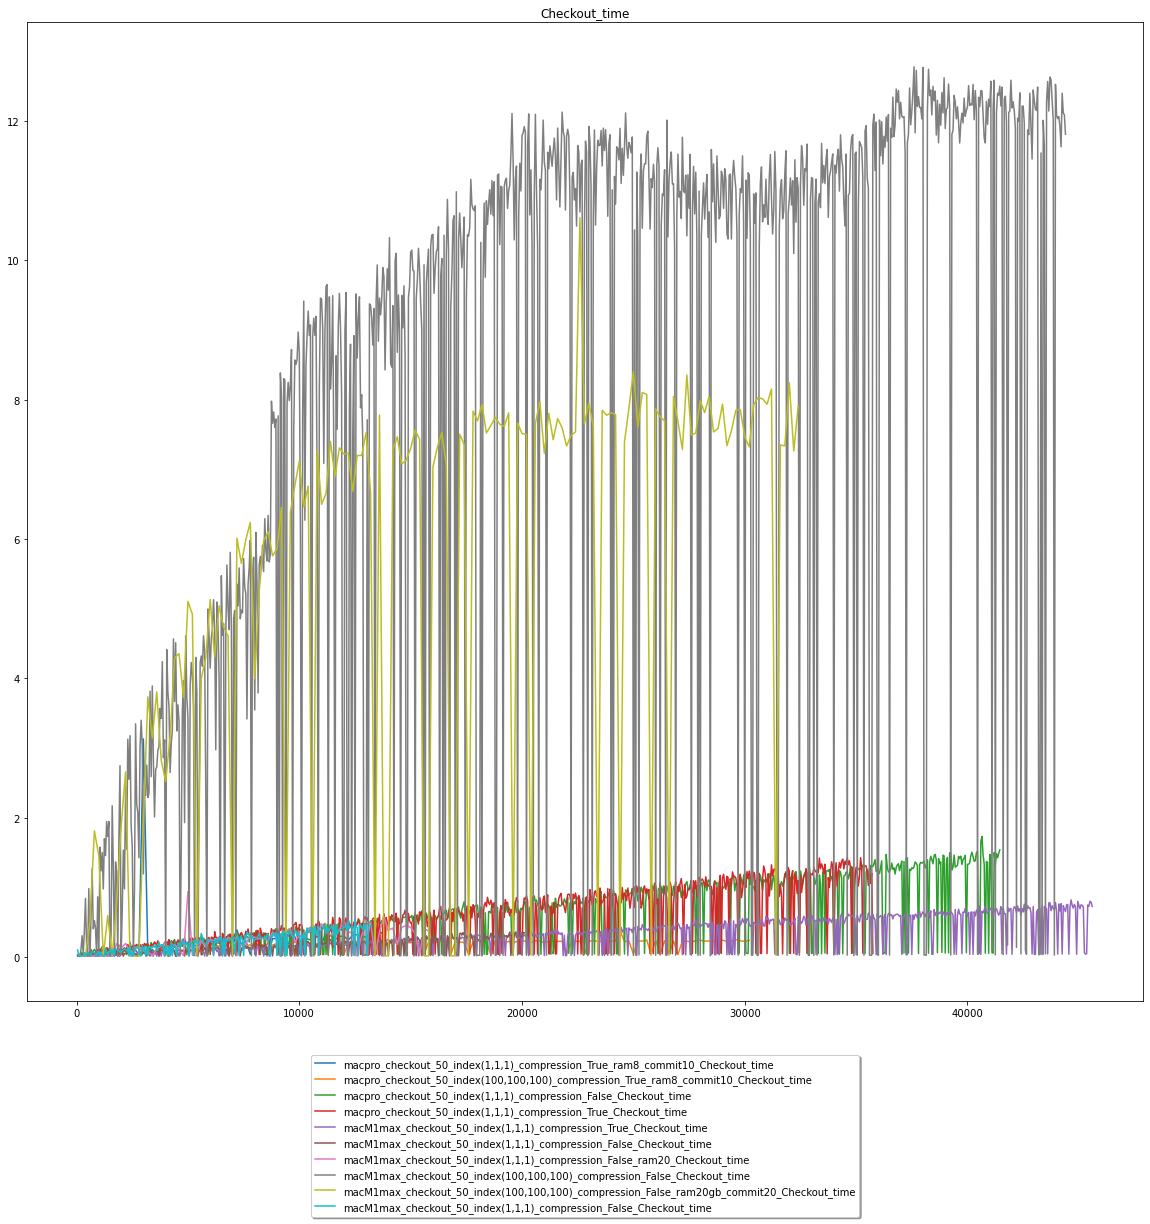

In [110]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Checkout_time",files=files_to_process,columns=['Checkout_time'],filter_files='time_benchmark',output_file='Checkout_time.png',legend_map=st_map)


item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4


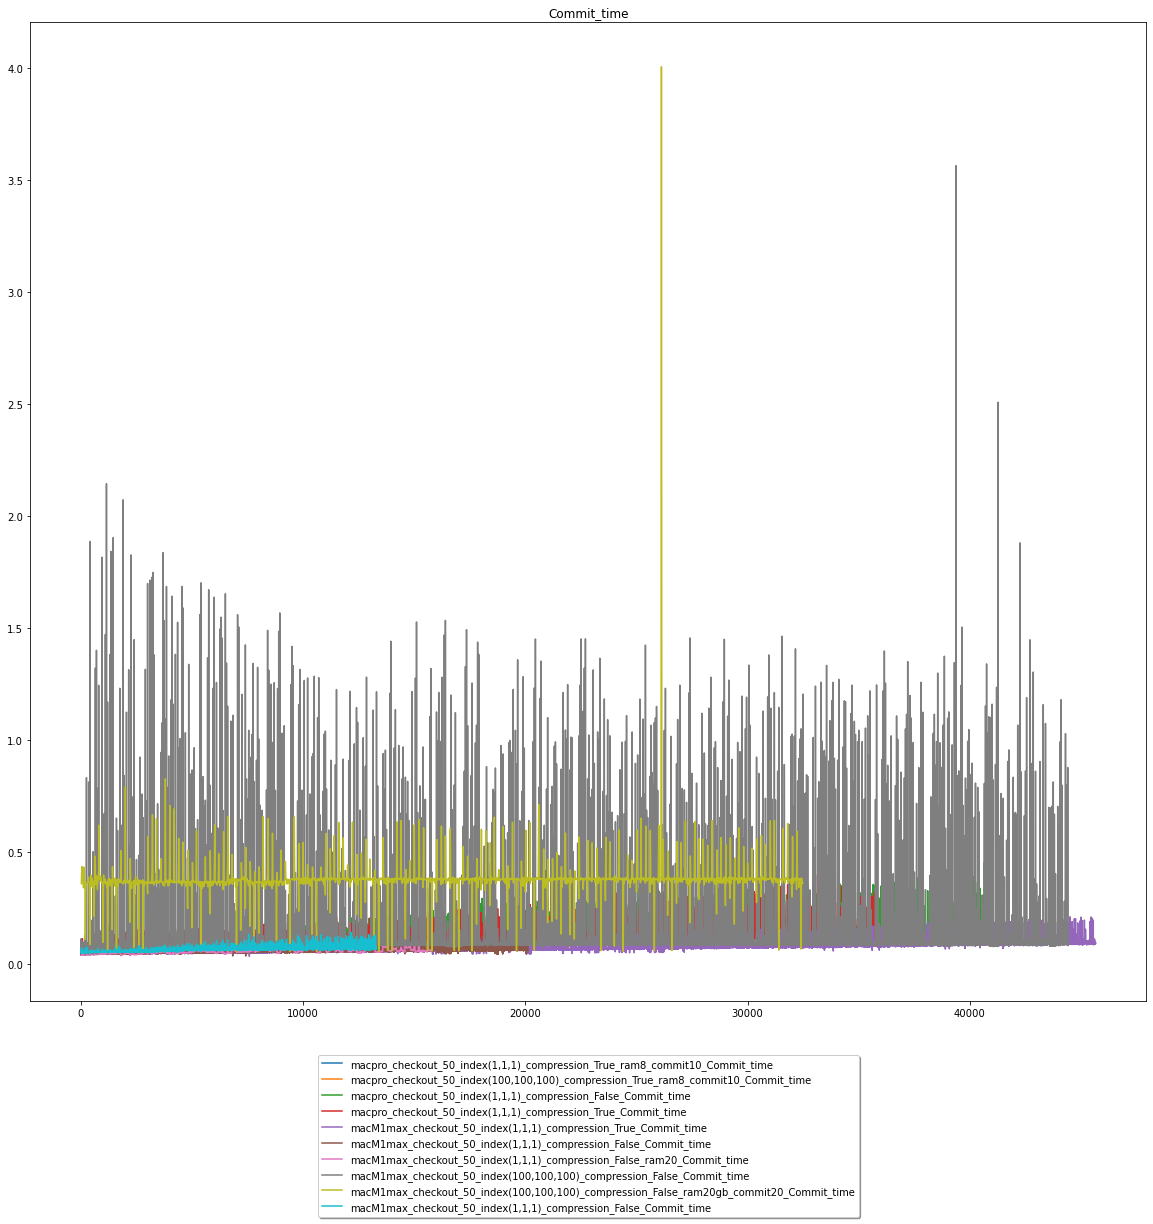

In [111]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Commit_time",files=files_to_process,columns=['Commit_time'],filter_files='time_benchmark',output_file='Commit_time.png',legend_map=st_map)


item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


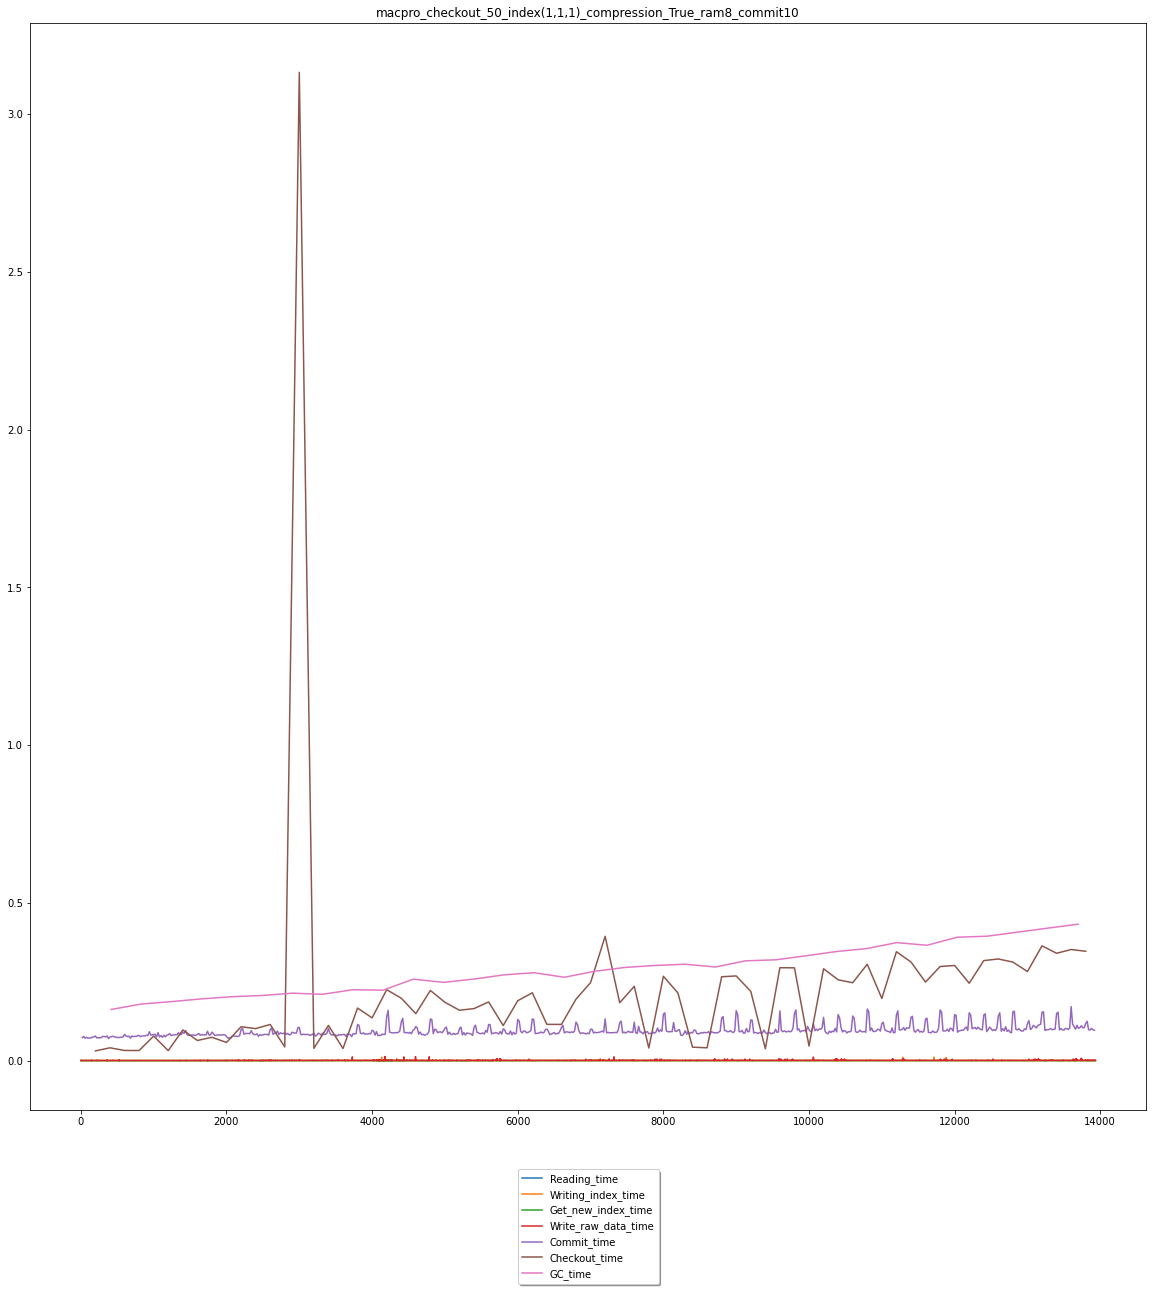

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


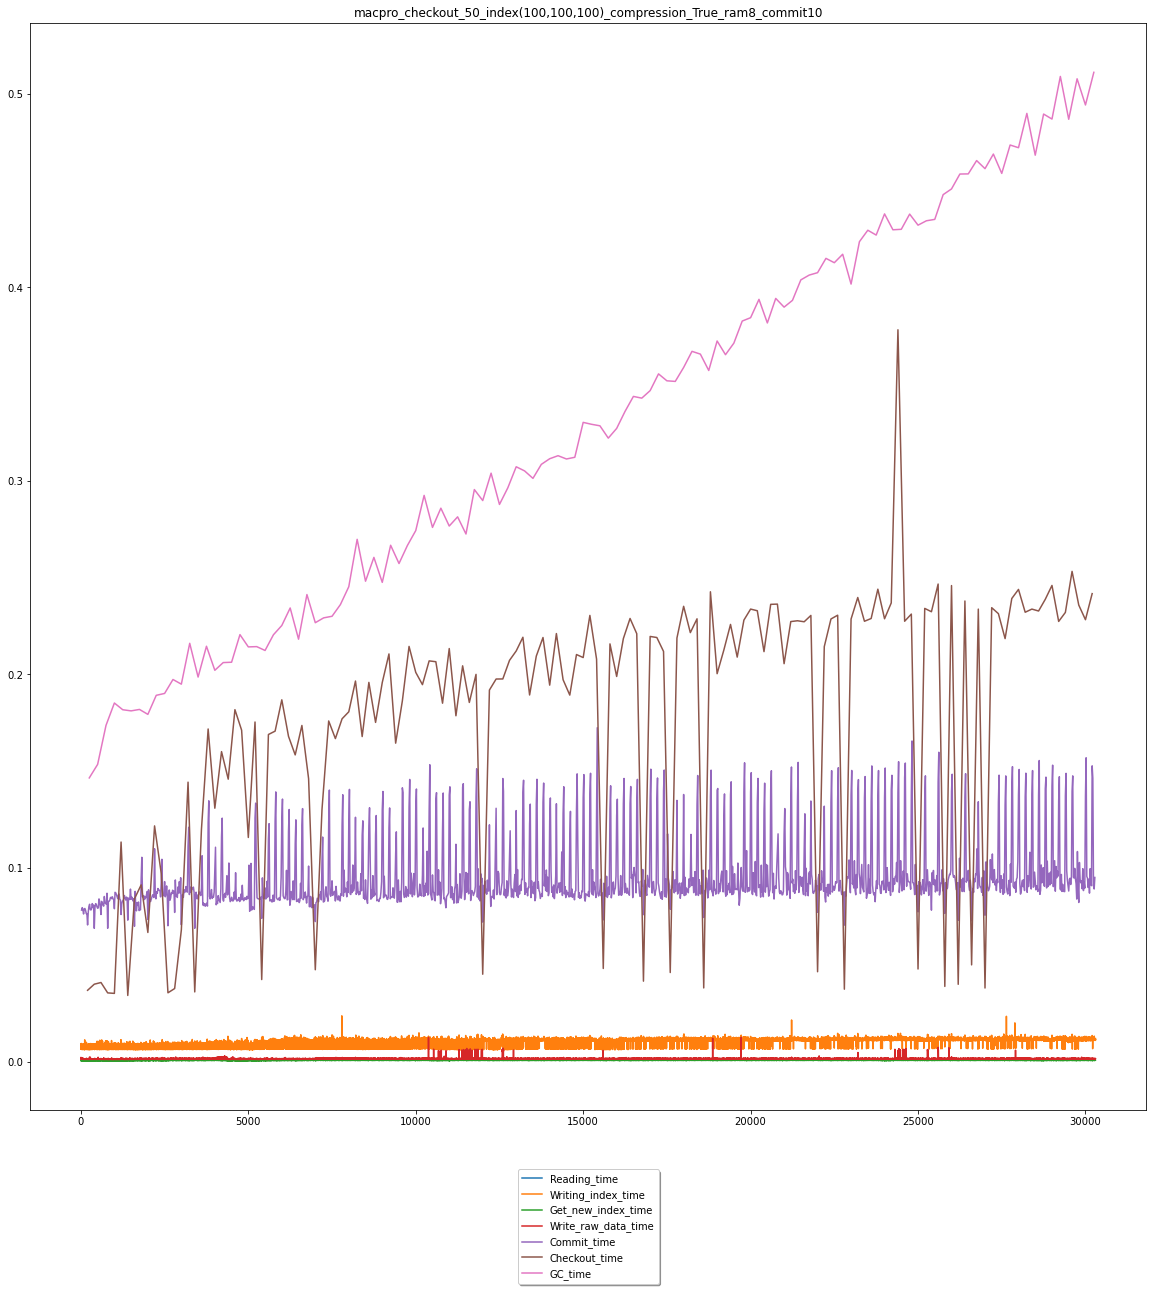

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


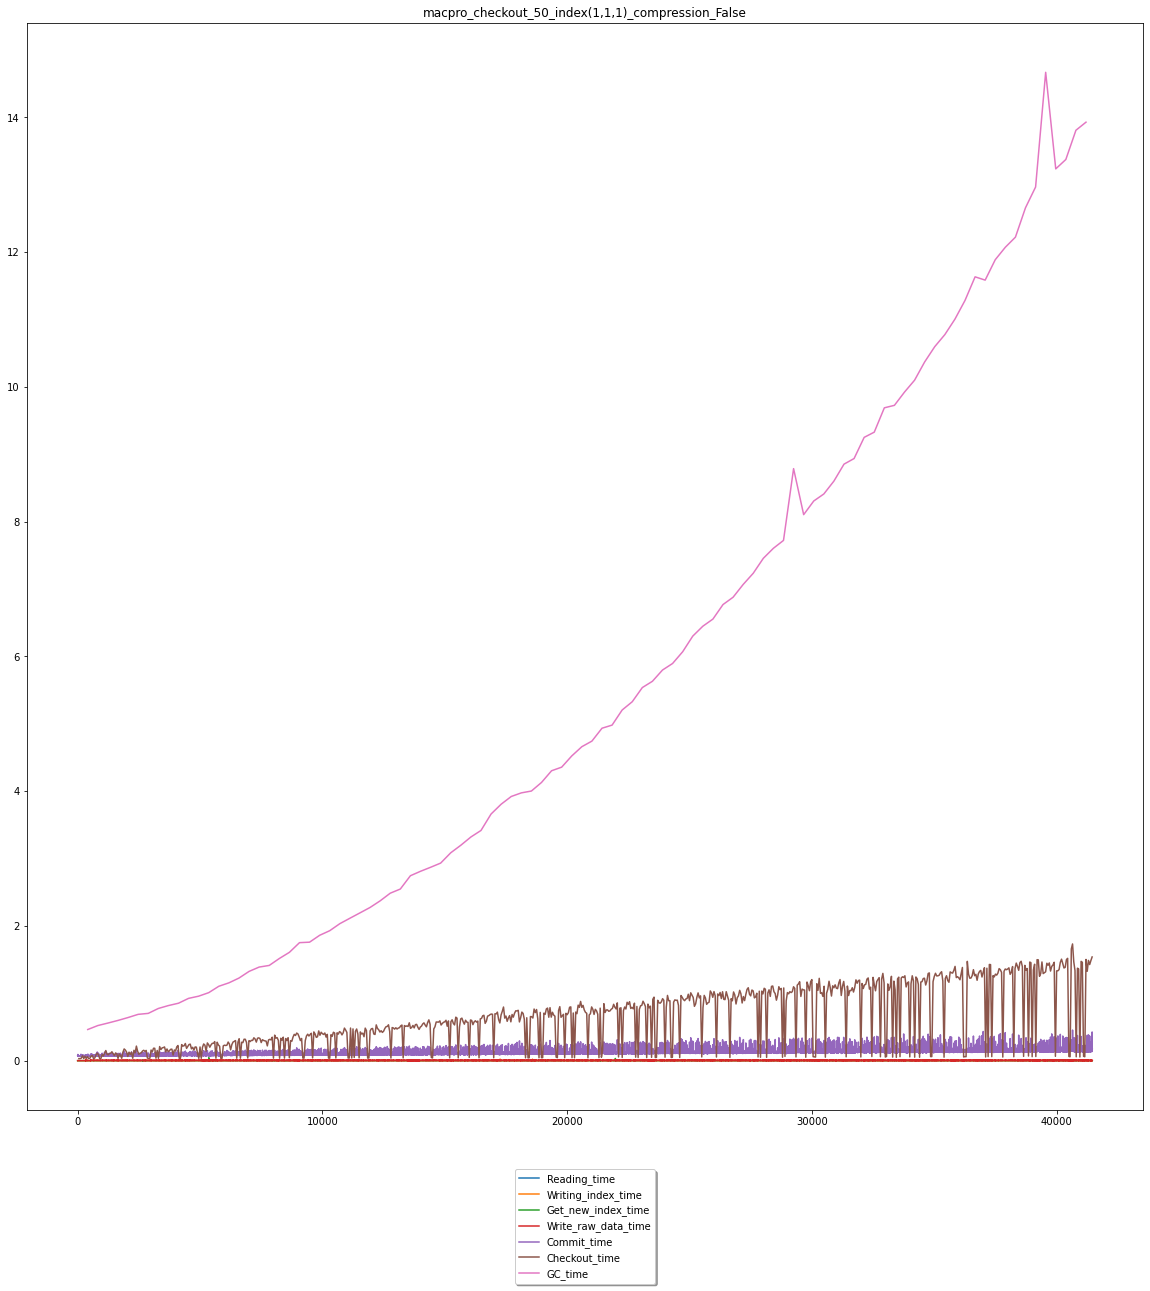

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


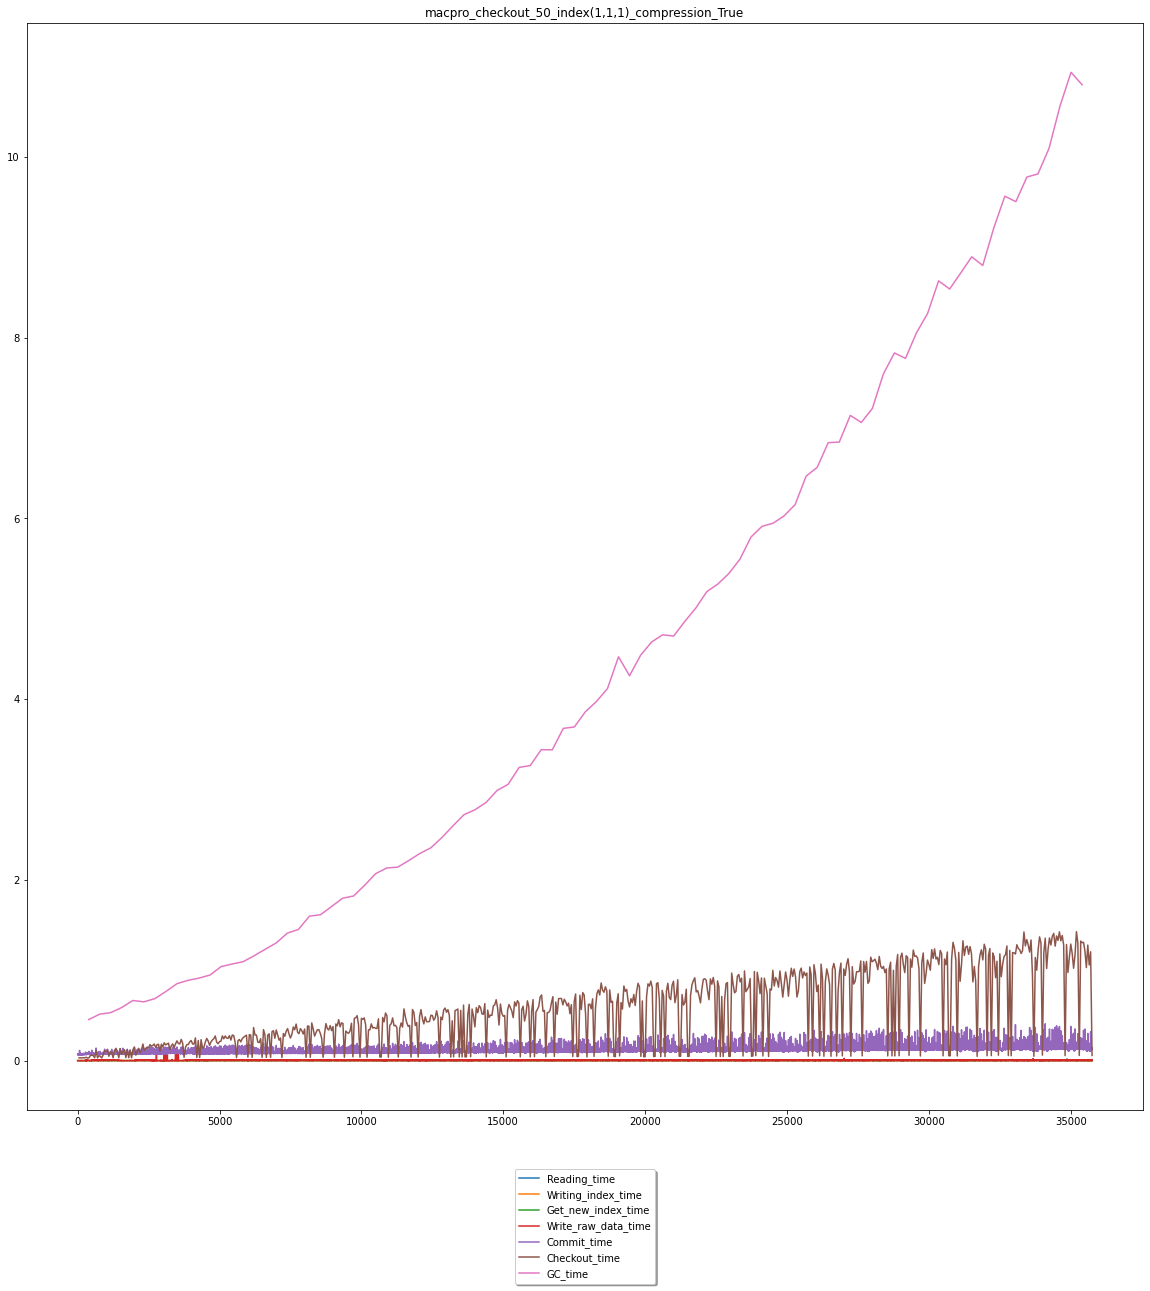

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


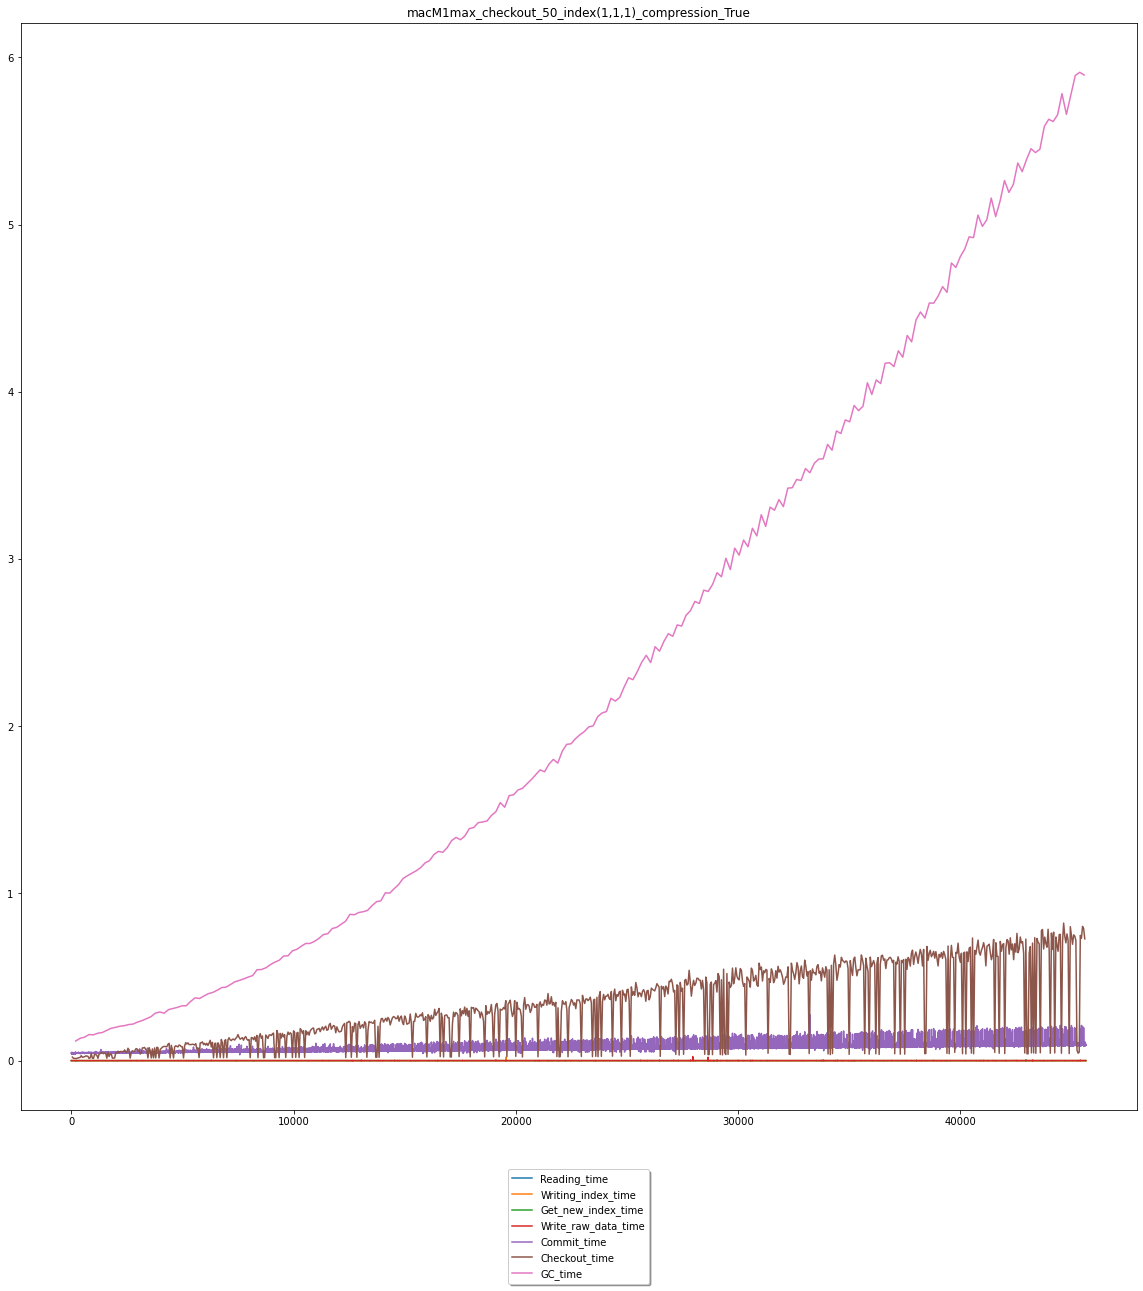

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


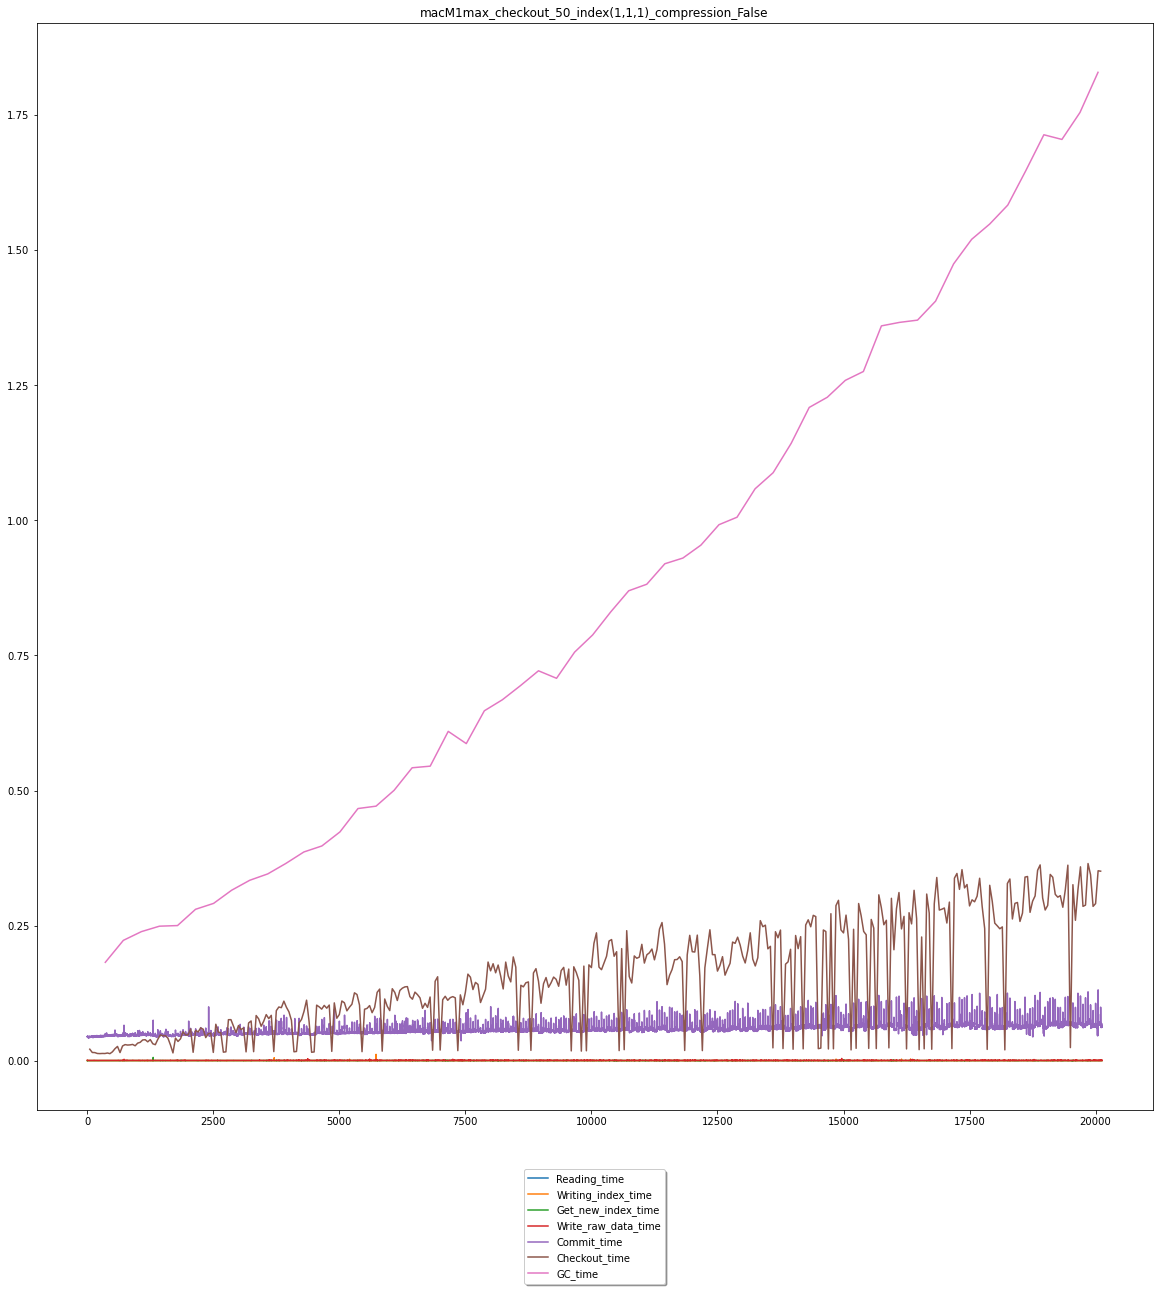

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


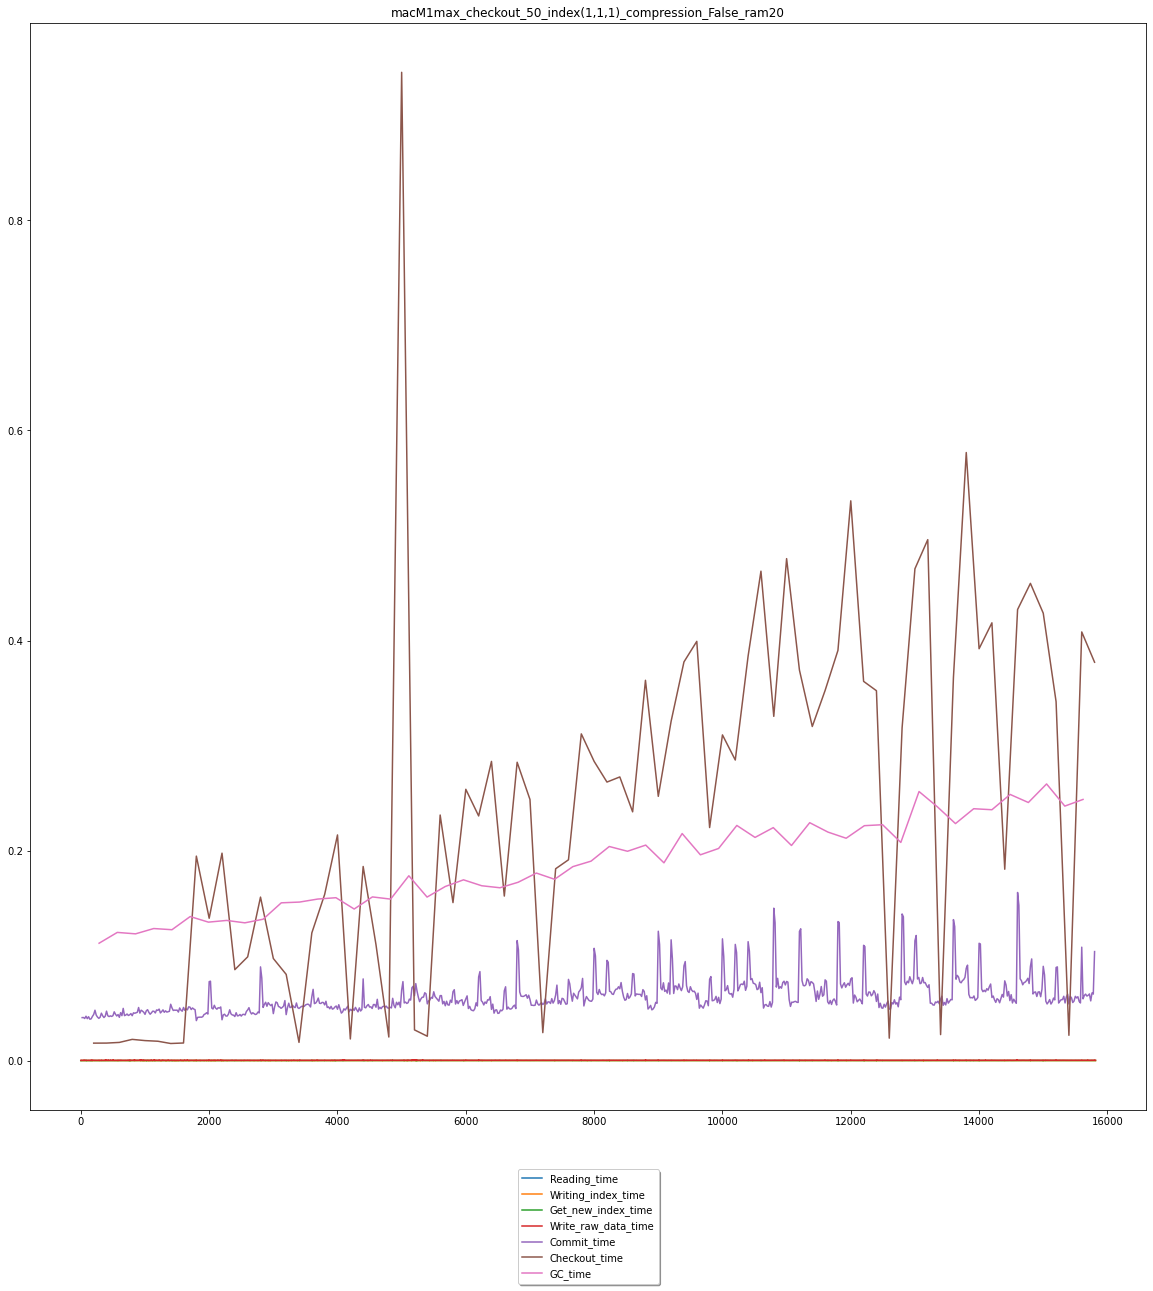

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


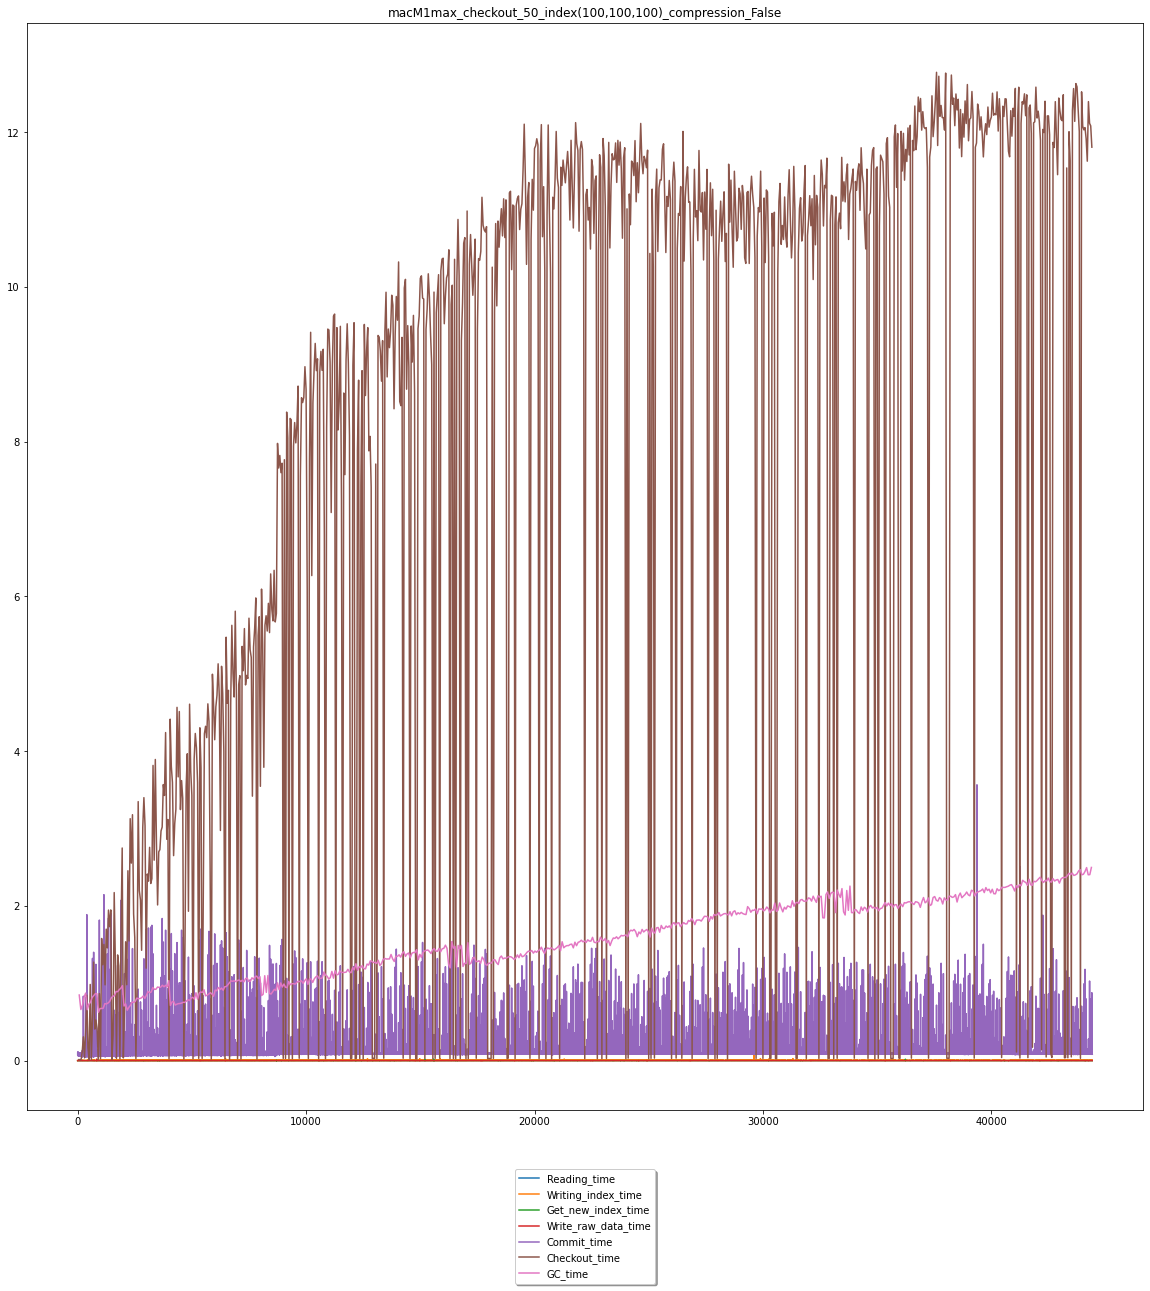

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


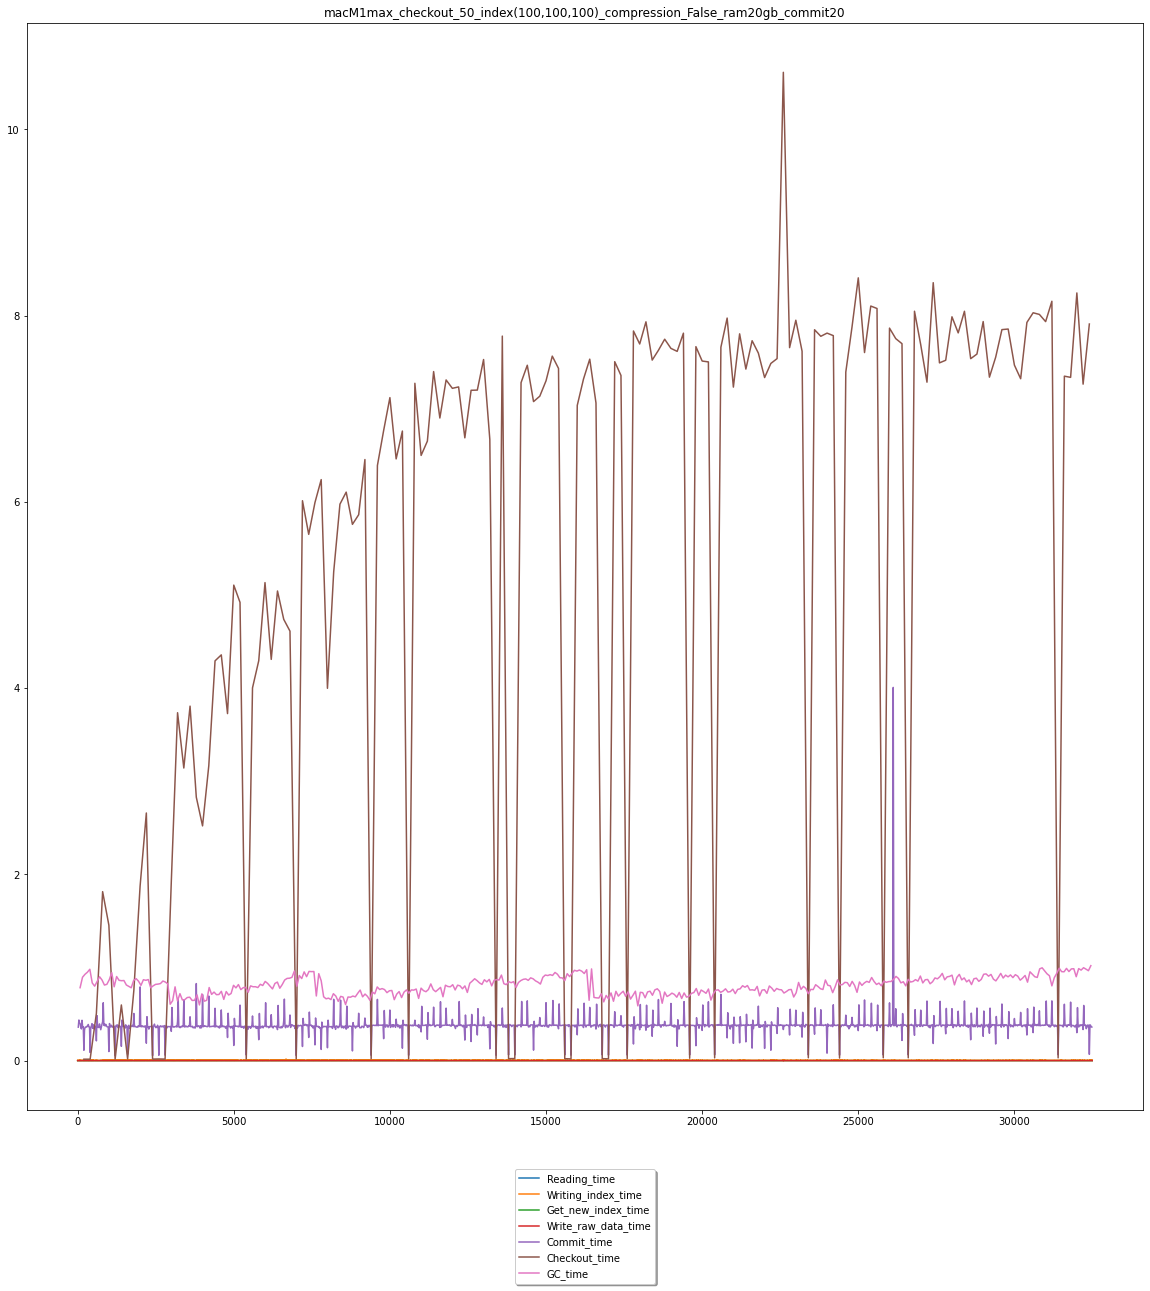

item index Reading_time = 0
got Reading_time
item index Writing_index_time = 1
got Writing_index_time
item index Get_new_index_time = 2
got Get_new_index_time
item index Write_raw_data_time = 3
got Write_raw_data_time
item index Commit_time = 4
got Commit_time
item index Checkout_time = 5
got Checkout_time
item index GC_time = 6
got GC_time


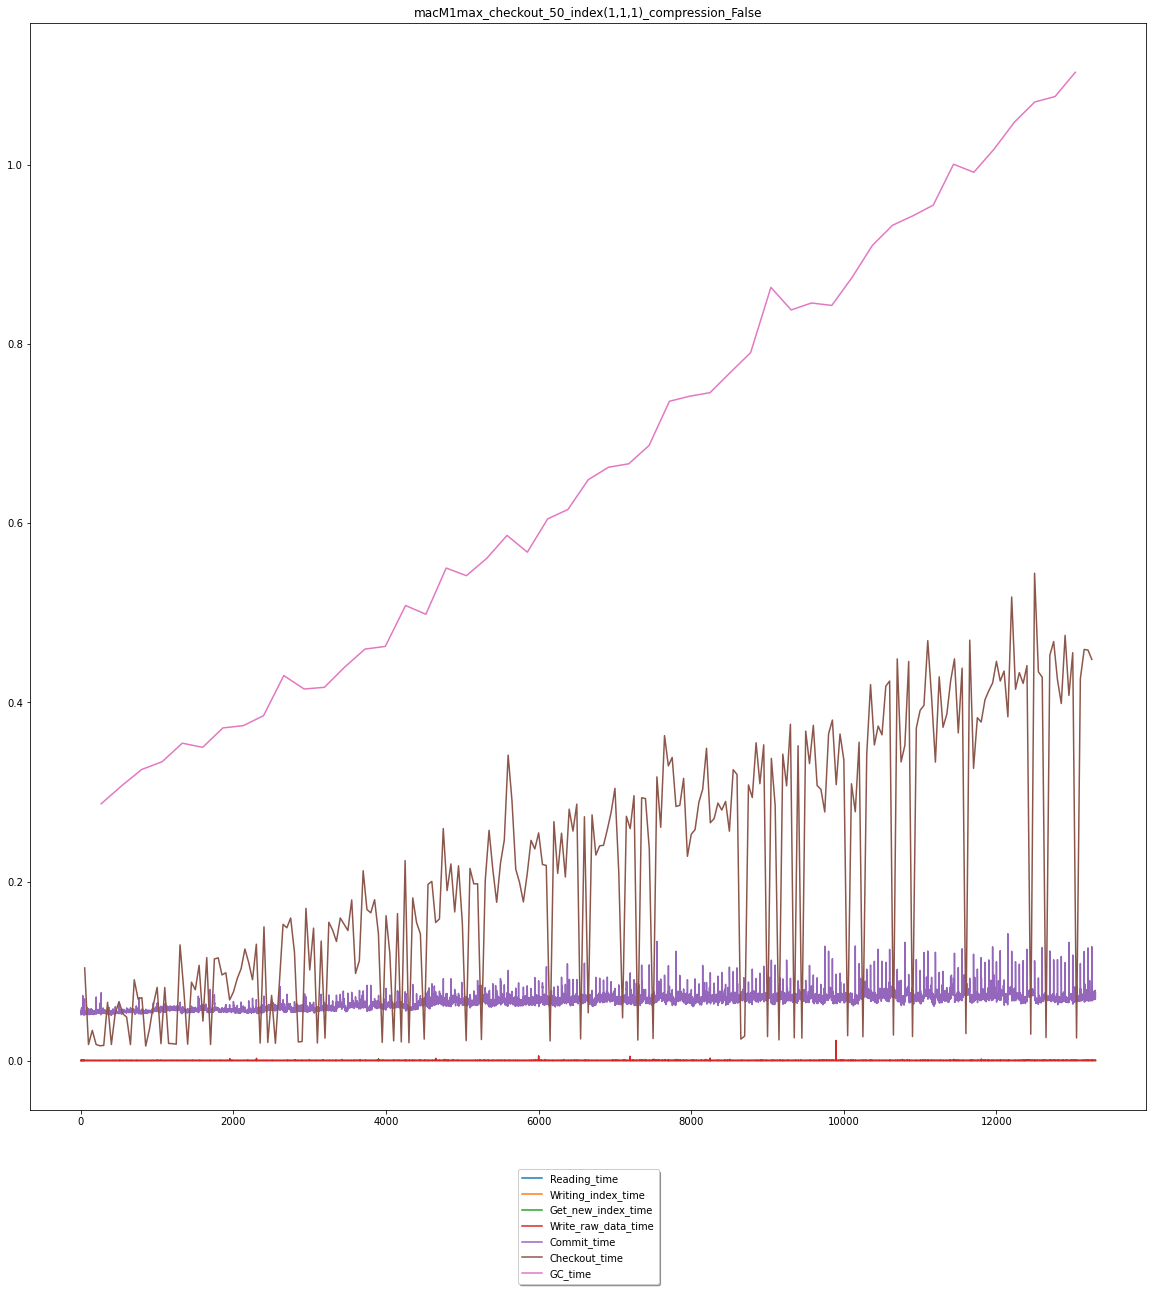

In [119]:
f1 = 'benchmarks/v2/benchmaks_mac_16gb/macpro_20220322_12_58_13_time_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv'
for f in files_to_process:
    if '_time_benchmark' in f:
        plot_file(f,title=st_map[f])
